# EDA Standard&Poor 500 - PIDA

In [ ]:
#instalamos las librerias necesaria
#!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


cargamos las librerias que vamos a usar en este EDA

In [ ]:
import yfinance as yf
import pandas as pd
import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


^GSPC usamos este simbolo porque es un indice y todo lo que vamos a usar y comparar en adelante de los sectores, como de las empresas seran indices

In [ ]:
df = yf.download("^GSPC", start="2000-01-01", end="2023-03-22")

df['Date'] = df.index
df.reset_index(drop = True, inplace = True)
df['Year'] = df['Date'].dt.year

df.insert(loc=5, column='Revenue', value=(df['Adj Close'] - df['Open']))


df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Revenue,Volume,Date,Year
0,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,-14.030029,931800000,2000-01-03,2000
1,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,-55.799927,1009000000,2000-01-04,2000
2,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,2.689941,1085500000,2000-01-05,2000
3,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1.339966,1092300000,2000-01-06,2000
4,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,38.020020,1225200000,2000-01-07,2000


vamos viendo la data ingestada

In [ ]:
df.shape

(5841, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       5841 non-null   float64       
 1   High       5841 non-null   float64       
 2   Low        5841 non-null   float64       
 3   Close      5841 non-null   float64       
 4   Adj Close  5841 non-null   float64       
 5   Revenue    5841 non-null   float64       
 6   Volume     5841 non-null   int64         
 7   Date       5841 non-null   datetime64[ns]
 8   Year       5841 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 410.8 KB


In [ ]:
df

,Open,High,Low,Close,Adj Close,Revenue,Volume,Date,Year
0,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,-14.030029,931800000,2000-01-03,2000
1,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,-55.799927,1009000000,2000-01-04,2000
2,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,2.689941,1085500000,2000-01-05,2000
3,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1.339966,1092300000,2000-01-06,2000
4,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,38.020020,1225200000,2000-01-07,2000
...,...,...,...,...,...,...,...,...,...
5836,3876.739990,3894.260010,3838.239990,3891.929932,3891.929932,15.189941,6594010000,2023-03-15,2023
5837,3878.929932,3964.459961,3864.110107,3960.280029,3960.280029,81.350098,5695790000,2023-03-16,2023
5838,3958.689941,3958.909912,3901.270020,3916.639893,3916.639893,-42.050049,9354280000,2023-03-17,2023
5839,3917.469971,3956.620117,3916.889893,3951.570068,3951.570068,34.100098,5347140000,2023-03-20,2023


In [ ]:
df.isnull().sum() 

Open         0
High         0
Low          0
Close        0
Adj Close    0
Revenue      0
Volume       0
Date         0
Year         0
dtype: int64

In [ ]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Revenue      0
Volume       0
Date         0
Year         0
dtype: int64

In [ ]:
df.duplicated().sum() 

0

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Revenue,Volume,Year
count,5841.000000,5841.000000,5841.000000,5841.000000,5841.000000,5841.000000,5.841000e+03,5841.000000
mean,1893.227279,1904.574873,1880.939372,1893.446365,1893.446365,0.219086,3.308139e+09,2011.115905
std,982.286987,987.488254,976.643413,982.420739,982.420739,20.851450,1.525447e+09,6.700063
min,679.280029,695.270020,666.789978,676.530029,676.530029,-150.220215,3.560700e+08,2000.000000
25%,1184.930054,1192.199951,1177.719971,1184.930054,1184.930054,-7.599976,1.992470e+09,2005.000000
50%,1436.560059,1446.290039,1427.959961,1437.209961,1437.209961,0.880005,3.414370e+09,2011.000000
75%,2404.550049,2416.679932,2393.879883,2404.389893,2404.389893,8.940186,4.163820e+09,2017.000000
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,149.539795,1.145623e+10,2023.000000


visualizamos todos las columnas en un grafico cada una

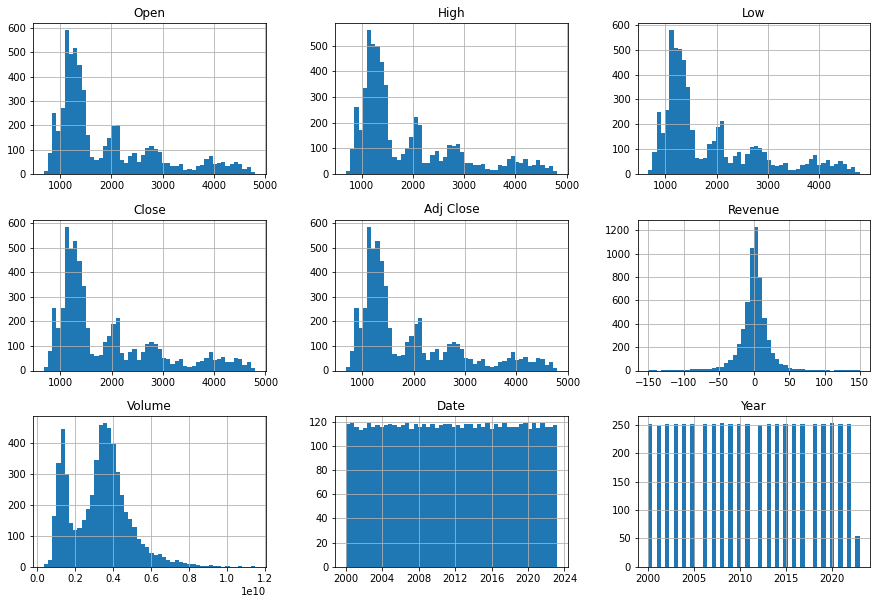

In [ ]:
df.hist(figsize=(15,10), bins=50)
plt.show()

## Graficamos para analizar la tendencia de los precios

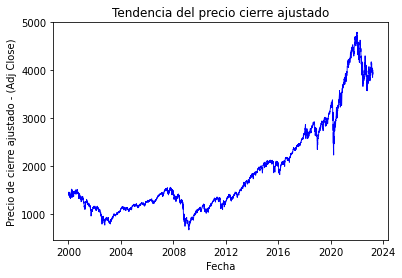

In [ ]:
plt.plot(df['Date'], df['Adj Close'], linewidth=0.9, color='blue')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado - (Adj Close)')
plt.title('Tendencia del precio cierre ajustado')
plt.show()

revisamos la correacion entres esas columnas

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Revenue,Volume,Year
Open,1.000000,0.999913,0.999871,0.999775,0.999775,-0.004199,0.348423,0.850599
High,0.999913,1.000000,0.999827,0.999881,0.999881,0.004891,0.350716,0.850387
Low,0.999871,0.999827,1.000000,0.999893,0.999893,0.007437,0.344818,0.850882
Close,0.999775,0.999881,0.999893,1.000000,1.000000,0.017026,0.347720,0.850734
Adj Close,0.999775,0.999881,0.999893,1.000000,1.000000,0.017026,0.347720,0.850734
Revenue,-0.004199,0.004891,0.007437,0.017026,0.017026,1.000000,-0.030872,0.011821
Volume,0.348423,0.350716,0.344818,0.347720,0.347720,-0.030872,1.000000,0.616176
Year,0.850599,0.850387,0.850882,0.850734,0.850734,0.011821,0.616176,1.000000


## con la data global, vamos a elaborar una grafica por año, tomando como base el promedio del precio al cierre (Close)

In [ ]:
dfyear_mean = df.groupby(['Year']).mean()
dfyear_mean['Year'] = dfyear_mean.index
dfyear_mean.reset_index(drop = True, inplace = True)
dfyear_mean.head()

,Open,High,Low,Close,Adj Close,Revenue,Volume,Year
0,1427.821149,1440.279128,1414.175124,1427.221069,1427.221069,-0.600080,1.034489e+09,2000
1,1194.883793,1204.043994,1183.334397,1194.178994,1194.178994,-0.704798,1.232068e+09,2001
2,994.951590,1003.863256,983.893415,993.934804,993.934804,-1.016786,1.429026e+09,2002
3,964.306945,971.268809,957.995634,965.227540,965.227540,0.920595,1.384451e+09,2003
4,1130.255516,1135.777662,1125.041824,1130.649445,1130.649445,0.393928,1.423204e+09,2004


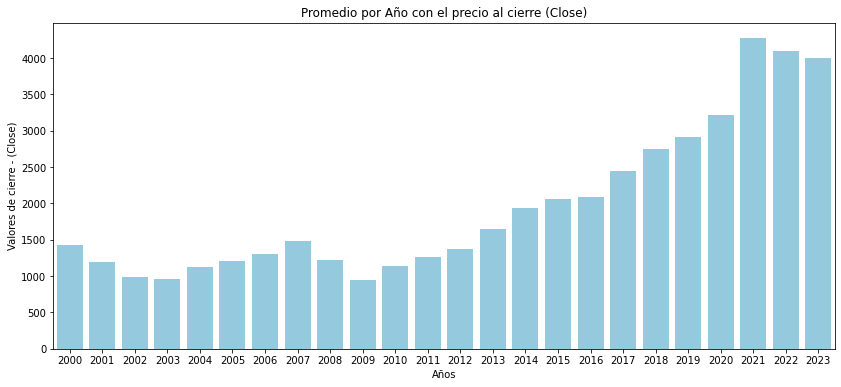

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Year', y='Close', data=dfyear_mean, color='skyblue')
plt.title('Promedio por Año con el precio al cierre (Close)')
plt.xlabel('Años')
plt.ylabel('Valores de cierre - (Close)')
plt.show()

###analizamos la diferencia entre precio de apertura y de cierre

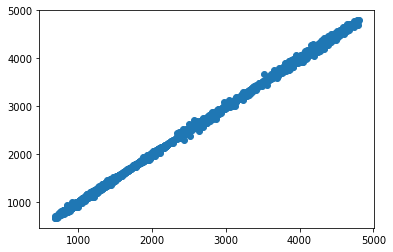

In [ ]:
plt.scatter(df['Open'], df['Close'])
plt.show()

####no hay mucha diferencias entre el precio de apertura y el de cierre. Y aunque pueda ser minima la ganancia es por el volumen de la compra

###analizamos la diferencia entre el precio de cierre y cierre ajustado

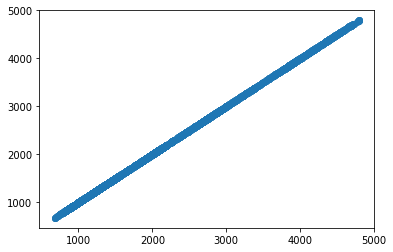

In [ ]:
plt.scatter(df['Adj Close'],df['Close'])
plt.show()

####practicamente es lo mismo con minimas diferencias entre el precio de cierre y el precio de cierre ajustado

###analizamos la relacion entre las 3 principales variables: precio de apertura(open), precio de cierre(close) y el volumen(volume)

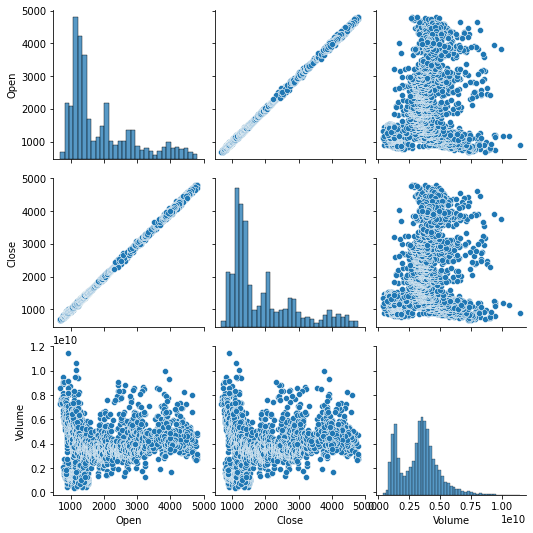

In [ ]:
sns.pairplot(data= df, vars=['Open','Close','Volume'])
plt.show()

####se nota la gran correlacion entre el precio de apertura y de cierre, asi como la dispersion que tiene el volumen respecto a las otras dos variables

###hacemos un mapa de calor de las 3 variables para certificar observacion anterior

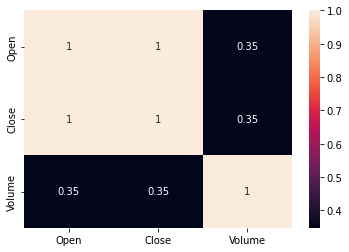

In [ ]:
sns.heatmap(df[['Open','Close','Volume']].corr(), annot=True)
plt.show()

####certificamos la gran correlacion entre los precios de apertura y de cierre

analizamos la data con el campo calculado Revenue

In [ ]:
df_revenue = df.groupby('Year').Revenue.sum()
df_revenue

Year
2000   -151.220093
2001   -174.789917
2002   -256.230103
2003    231.989990
2004     99.269897
2005     35.879761
2006    175.359985
2007     56.720581
2008   -502.179749
2009    258.129761
2010    150.129456
2011      5.190918
2012    168.380371
2013    378.080444
2014    156.649414
2015    -50.469238
2016    141.047974
2017    200.923340
2018   -425.829834
2019    435.646240
2020     26.710938
2021    558.160400
2022   -530.036621
2023    292.169189
Name: Revenue, dtype: float64

####observamos varias caidas con valor negativo
2000
2001
2002
2008
2015
2018
2022 por el covid

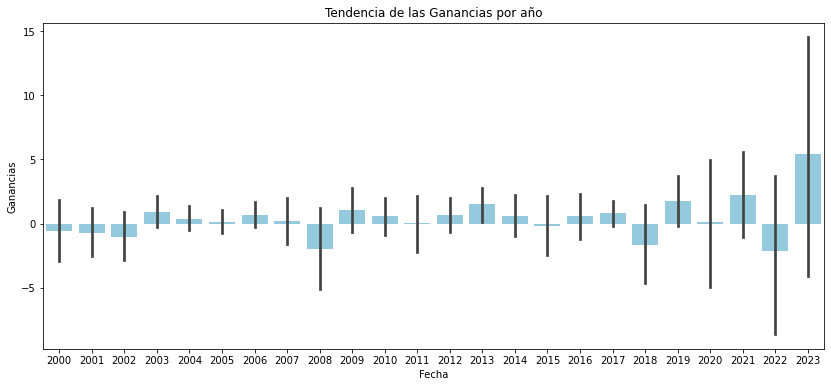

In [ ]:
plt.figure(figsize=(14, 6))
#plt.plot(df['Date'], df['Revenue'], linewidth=0.9, color='blue')
#plt.barplot(df['Date'], df['Revenue'])

sns.barplot(x='Year', y='Revenue', data=df, color='skyblue')

#kind="ecdf"
#sns.displot(data=tips, x="total_bill", col="time", kde=True)

plt.xlabel('Fecha')
plt.ylabel('Ganancias')
plt.title('Tendencia de las Ganancias por año')
plt.show()

## Analizamos los sectores/industria para saber cual elegir como portafolio para recomenda

###obtenemos la lista de empresas del wikipedia
https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [ ]:
sp500list = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500list.head(3)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888


In [ ]:
sp500list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             493 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [ ]:
sp500list.shape

(503, 8)

In [ ]:
dfsector = sp500list.groupby('GICS Sector').count()
dfsector['nombre_sector'] = dfsector.index
dfsector.reset_index(drop=True, inplace=True)
dfsector = dfsector[ ['nombre_sector', 'Founded'] ]
dfsector.rename(columns={'Founded': 'totcias'}, inplace=True)
dfsector

,nombre_sector,totcias
0,Communication Services,24
1,Consumer Discretionary,53
2,Consumer Staples,37
3,Energy,23
4,Financials,73
5,Health Care,65
6,Industrials,73
7,Information Technology,66
8,Materials,29
9,Real Estate,30


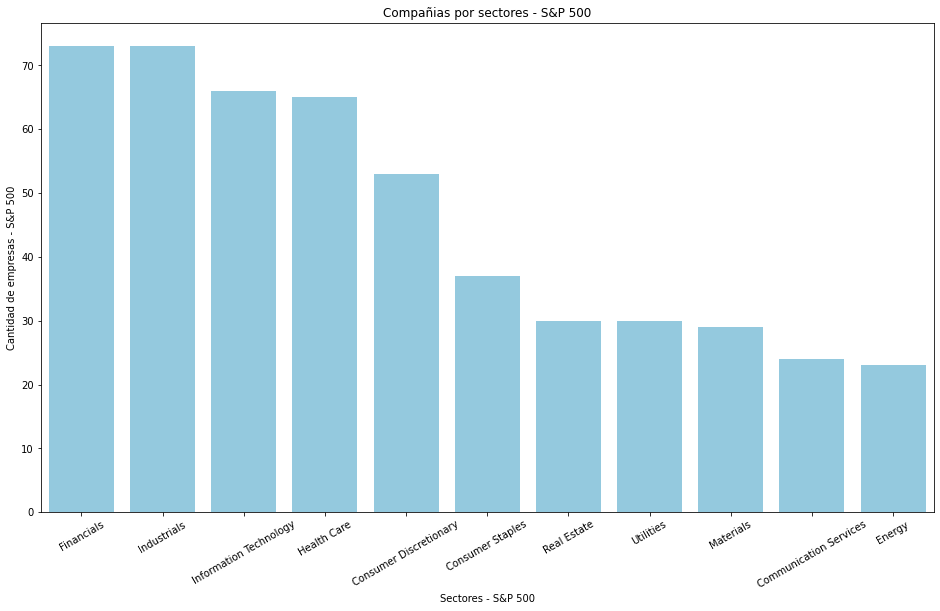

In [ ]:
plt.figure(figsize=(16, 9))
sns.barplot(x='nombre_sector', y='totcias', data=dfsector, order=dfsector.sort_values('totcias', ascending=False).nombre_sector, color='skyblue')
plt.title('Compañias por sectores - S&P 500')
plt.xlabel('Sectores - S&P 500')
plt.xticks(rotation = 30)
plt.ylabel('Cantidad de empresas - S&P 500')
plt.show()

In [ ]:
dfsector.shape

(11, 2)

###obtenemos las data de las 500 empresas y ver su tendencia como sector

In [ ]:
sp500companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500companies.head(3)

sp500companies.rename(columns={'GICS Sector': 'Sector'}, inplace=True)
sp500_data = pd.DataFrame()

for _, company in sp500companies.iterrows():
    symbol = company['Symbol']
    sector = company['Sector']
    # Obtenemos la data de cada symbol
    data = yf.download(symbol, start='2000-01-01', end='2023-03-22')['Adj Close']
    if len(data) > 0:
        data = data.to_frame()
        data.loc[:, 'Symbol'] = symbol
        data.loc[:, 'Sector'] = sector
        sp500_data = pd.concat([sp500_data, data], axis=0)
      

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
sp500_data

,Adj Close,Symbol,Sector
Date,,,
2000-01-03,25.525517,MMM,Industrials
2000-01-04,24.511263,MMM,Industrials
2000-01-05,25.221239,MMM,Industrials
2000-01-06,27.249752,MMM,Industrials
2000-01-07,27.790699,MMM,Industrials
...,...,...,...
2023-03-15,163.570007,ZTS,Health Care
2023-03-16,166.309998,ZTS,Health Care
2023-03-17,164.470001,ZTS,Health Care


In [ ]:
sp500_data['Date'] = sp500_data.index
sp500_data.reset_index(drop = True, inplace = True)


In [ ]:
sp500_data

,Adj Close,Symbol,Sector,Date
0,25.525517,MMM,Industrials,2000-01-03
1,24.511263,MMM,Industrials,2000-01-04
2,25.221239,MMM,Industrials,2000-01-05
3,27.249752,MMM,Industrials,2000-01-06
4,27.790699,MMM,Industrials,2000-01-07
...,...,...,...,...
2613845,163.570007,ZTS,Health Care,2023-03-15
2613846,166.309998,ZTS,Health Care,2023-03-16
2613847,164.470001,ZTS,Health Care,2023-03-17
2613848,165.820007,ZTS,Health Care,2023-03-20


In [ ]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613850 entries, 0 to 2613849
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Adj Close  float64       
 1   Symbol     object        
 2   Sector     object        
 3   Date       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 79.8+ MB


In [ ]:
# no pude ponerle Year, ya lo deje asi mucho tiempo perdido en la tabla inicial...
#sp500_data['Year'] = sp500_data['Date'].sp500_data.year
#sp500_data.insert(column='Year', value=(sp500_data['Date'].sp500_data.year))

## guardanos archivos para portafolio

In [ ]:
#sp500_data.to_csv("/content/drive/MyDrive/Colab Notebooks/PIDA/sp500companies.csv", index=False, encoding="UTF8")


In [ ]:
#df.to_csv("/content/drive/MyDrive/Colab Notebooks/PIDA/GSPC.csv", index=False, encoding="UTF8")

In [ ]:
sp500_data.duplicated().sum()

0

In [ ]:
sp500_data.isna().sum()

Adj Close    0
Symbol       0
Sector       0
Date         0
dtype: int64

In [ ]:
#retomamos el avance
#sp500_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PIDA/sp500companies.csv", encoding="UTF8")


In [ ]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613850 entries, 0 to 2613849
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Adj Close  float64
 1   Symbol     object 
 2   Sector     object 
 3   Date       object 
dtypes: float64(1), object(3)
memory usage: 79.8+ MB


In [ ]:
sp500_data

,Adj Close,Symbol,Sector,Date
0,25.525517,MMM,Industrials,2000-01-03
1,24.511263,MMM,Industrials,2000-01-04
2,25.221239,MMM,Industrials,2000-01-05
3,27.249752,MMM,Industrials,2000-01-06
4,27.790699,MMM,Industrials,2000-01-07
...,...,...,...,...
2613845,163.570007,ZTS,Health Care,2023-03-15
2613846,166.309998,ZTS,Health Care,2023-03-16
2613847,164.470001,ZTS,Health Care,2023-03-17
2613848,165.820007,ZTS,Health Care,2023-03-20


convertimos el campo Date para que sea del tipo Fecha(datetime)

In [ ]:
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])


In [ ]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613850 entries, 0 to 2613849
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Adj Close  float64       
 1   Symbol     object        
 2   Sector     object        
 3   Date       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 79.8+ MB


In [ ]:
#no pude crear el campo Year, lo deje de intentar por el tiempo
#sp500_data['Year'] = sp500_data['Date'] #.sp500_data.year


####agrupamos para observar el rendimiento por sector


In [ ]:
grouped_data = sp500_data.groupby(['Sector', pd.Grouper(key="Date", freq='Y')])['Adj Close'].mean().reset_index()
grouped_data

,Sector,Date,Adj Close
0,Communication Services,2000-12-31,16.630976
1,Communication Services,2001-12-31,15.054645
2,Communication Services,2002-12-31,12.889640
3,Communication Services,2003-12-31,13.486497
4,Communication Services,2004-12-31,14.971483
...,...,...,...
259,Utilities,2019-12-31,58.892423
260,Utilities,2020-12-31,60.671098
261,Utilities,2021-12-31,65.614426
262,Utilities,2022-12-31,72.379272


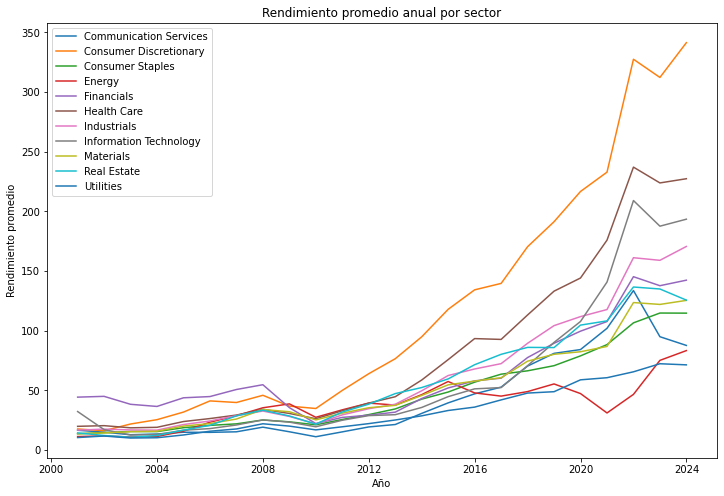

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

# barremos el dataset agrupado por sector
for sector, data in grouped_data.groupby('Sector'):
    ax.plot(data['Date'], data['Adj Close'], label=sector)

ax.set_title('Rendimiento por Sector - promedio anual')
ax.set_xlabel('Año')
ax.set_ylabel('Rendimiento')
ax.legend()

plt.show()

###guardamos archivo modificado y nuevo para usarlo en el dashboard

In [ ]:
sp500_data.to_csv("/content/drive/MyDrive/Colab Notebooks/PIDA/sp500companies.csv", index=False, encoding="UTF8")


In [ ]:
grouped_data.to_csv("/content/drive/MyDrive/Colab Notebooks/PIDA/sp500sectorrendimiento.csv", index=False, encoding="UTF8")


###SELECCIONAMOS LAS EMPRESAS PARA EL PORTAFOLIO A RECOMENDAR

In [ ]:
#retomamos el avance
sp500_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PIDA/sp500companies.csv", encoding="UTF8")

In [ ]:
sp500_data.groupby('Sector').count()

,Adj Close,Symbol,Date
Sector,,,
Communication Services,109002,109002,109002
Consumer Discretionary,277057,277057,277057
Consumer Staples,194732,194732,194732
Energy,119608,119608,119608
Financials,385119,385119,385119
Health Care,341257,341257,341257
Industrials,379308,379308,379308
Information Technology,331002,331002,331002
Materials,147386,147386,147386


####seleccionamos el sector a trabajar = Tecnologia

In [ ]:
information_df = sp500_data[sp500_data['Sector'] == 'Information Technology']
information_df


,Adj Close,Symbol,Sector,Date
20095,11.056036,ACN,Information Technology,2001-07-19
20096,10.939425,ACN,Information Technology,2001-07-20
20097,10.932137,ACN,Information Technology,2001-07-23
20098,10.830102,ACN,Information Technology,2001-07-24
20099,10.895697,ACN,Information Technology,2001-07-25
...,...,...,...,...
2600005,287.739990,ZBRA,Information Technology,2023-03-15
2600006,294.929993,ZBRA,Information Technology,2023-03-16
2600007,288.709991,ZBRA,Information Technology,2023-03-17
2600008,290.839996,ZBRA,Information Technology,2023-03-20


####agrupamos por Symbol y acumulamos su precio de cierre

In [ ]:
tech_df2 = information_df.groupby(['Symbol'])[['Adj Close']].sum()
tech_df2.head()

,Adj Close
Symbol,
AAPL,174104.276388
ACN,485565.104199
ADBE,697164.502068
ADI,312078.728151
ADSK,426970.721201


In [ ]:
tech_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, AAPL to ZBRA
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  66 non-null     float64
dtypes: float64(1)
memory usage: 1.0+ KB


####convertimos indice Symbol en una columna como SymbolBl

In [ ]:
tech_df2['SymbolBl'] = tech_df2.index
tech_df2.reset_index(drop = True, inplace = True)


In [ ]:
tech_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  66 non-null     float64
 1   SymbolBl   66 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
tech_df2.sort_values('Adj Close', ascending=False, inplace=True)

In [ ]:
tech_df2

,Adj Close,SymbolBl
52,831116.636395,ROP
22,699614.031316,FICO
2,697164.502068,ADBE
57,679539.802634,TDY
36,657983.276536,LRCX
...,...,...
46,81740.804367,ON
28,78054.257898,HPQ
25,56543.082772,GEN
24,54100.882991,FTNT


####seleccionamos las 5 mejores empresas TECH con el precio de cierre mas alto
######añadiremos a apple y microsoft porque siempre son referentes


In [ ]:
empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
#añadiremos a apple y microsoft porque siempre son referentes
#    'ROP',  # Roper Technologies, Inc., 'FICO', # Fair Isaac Corporation, 'ADBE', # Adobe Inc.
#    'TDY',  # Teledyne Technologies Incorporated, 'LRCX', # Lam Research Corporation
#    'AAPL', # Apple Inc., 'MSFT'  # Microsoft

In [ ]:
empresas = [
    'ROP',  # Roper Technologies, Inc.
    'FICO', # Fair Isaac Corporation
    'ADBE', # Adobe Inc.
    'TDY',  # Teledyne Technologies Incorporated
    'LRCX', # Lam Research Corporation
    'AAPL', # Apple Inc.
    'MSFT'  # Microsoft
]

recolector = []
for nemo in empresas:
    ticker = yf.Ticker(nemo)
    px = ticker.history(start='2000-01-01', interval='1d')[['Open', 'Close','Volume']]
    px.columns = [f"{nemo}_{col}" for col in px.columns]
    recolector.append(px)

precios = pd.concat(recolector, axis=1)

In [ ]:
precios

,ROP_Open,ROP_Close,ROP_Volume,FICO_Open,FICO_Close,FICO_Volume,ADBE_Open,ADBE_Close,ADBE_Volume,TDY_Open,...,TDY_Volume,LRCX_Open,LRCX_Close,LRCX_Volume,AAPL_Open,AAPL_Close,AAPL_Volume,MSFT_Open,MSFT_Close,MSFT_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,16.278395,15.309763,88000,15.191552,15.066592,65813,16.693564,16.274673,7384400,9.562500,...,315400,32.917300,32.735233,3183900,0.796974,0.850644,535796800,36.615023,36.361565,53228400
2000-01-04 00:00:00-05:00,15.067604,14.610194,153200,15.013033,14.423937,102263,15.638578,14.909398,7813200,9.375000,...,444300,31.815815,31.315136,3295800,0.822621,0.778925,512377600,35.425723,35.133270,54119000
2000-01-05 00:00:00-05:00,14.610189,14.421844,262200,14.459644,14.281130,74925,14.459480,15.204174,14927200,9.062500,...,109100,31.169487,30.859976,3094800,0.788424,0.790324,778321600,34.665352,35.503716,64059600
2000-01-06 00:00:00-05:00,14.421844,14.421844,211800,14.245426,13.888397,127913,15.250715,15.328287,10221200,9.625000,...,120700,30.532256,30.641495,2642100,0.806473,0.721931,767972800,34.996792,34.314404,54976600
2000-01-07 00:00:00-05:00,14.368029,14.637094,181600,13.745585,14.174019,105638,15.281743,16.072981,8253200,9.562500,...,222100,30.732535,31.096663,3684600,0.733330,0.756128,460734400,33.885468,34.762825,62013600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22 00:00:00-04:00,431.950012,428.579987,854100,694.059998,678.700012,217300,375.000000,361.709991,3878400,423.679993,...,347200,506.989990,506.299988,1213900,159.300003,157.830002,75701800,273.399994,272.290009,34873300
2023-03-23 00:00:00-04:00,428.739990,425.049988,852600,682.849976,680.849976,218700,368.989990,369.000000,3138600,421.000000,...,120200,514.390015,523.590027,1537900,158.830002,158.929993,67622100,277.940002,277.660004,36610900
2023-03-24 00:00:00-04:00,425.160004,429.589996,673300,677.549988,690.940002,130600,370.230011,374.959991,2993400,416.029999,...,154900,515.000000,502.059998,1396000,158.860001,160.250000,59196500,277.239990,280.570007,28172000


In [ ]:
precios['DateIE'] = precios.index
precios.reset_index(drop = True, inplace = True)

####verificamos la data de los precios de las 7 empresas


In [ ]:
print(precios.isnull())


      ROP_Open  ROP_Close  ROP_Volume  FICO_Open  FICO_Close  FICO_Volume  \
0        False      False       False      False       False        False   
1        False      False       False      False       False        False   
2        False      False       False      False       False        False   
3        False      False       False      False       False        False   
4        False      False       False      False       False        False   
...        ...        ...         ...        ...         ...          ...   
5841     False      False       False      False       False        False   
5842     False      False       False      False       False        False   
5843     False      False       False      False       False        False   
5844     False      False       False      False       False        False   
5845     False      False       False      False       False        False   

      ADBE_Open  ADBE_Close  ADBE_Volume  TDY_Open  ...  LRCX_Open  \
0    

In [ ]:
precios

,ROP_Open,ROP_Close,ROP_Volume,FICO_Open,FICO_Close,FICO_Volume,ADBE_Open,ADBE_Close,ADBE_Volume,TDY_Open,...,LRCX_Open,LRCX_Close,LRCX_Volume,AAPL_Open,AAPL_Close,AAPL_Volume,MSFT_Open,MSFT_Close,MSFT_Volume,DateIE
0,16.278395,15.309763,88000,15.191552,15.066592,65813,16.693564,16.274673,7384400,9.562500,...,32.917300,32.735233,3183900,0.796974,0.850644,535796800,36.615023,36.361565,53228400,2000-01-03 00:00:00-05:00
1,15.067604,14.610194,153200,15.013033,14.423937,102263,15.638578,14.909398,7813200,9.375000,...,31.815815,31.315136,3295800,0.822621,0.778925,512377600,35.425723,35.133270,54119000,2000-01-04 00:00:00-05:00
2,14.610189,14.421844,262200,14.459644,14.281130,74925,14.459480,15.204174,14927200,9.062500,...,31.169487,30.859976,3094800,0.788424,0.790324,778321600,34.665352,35.503716,64059600,2000-01-05 00:00:00-05:00
3,14.421844,14.421844,211800,14.245426,13.888397,127913,15.250715,15.328287,10221200,9.625000,...,30.532256,30.641495,2642100,0.806473,0.721931,767972800,34.996792,34.314404,54976600,2000-01-06 00:00:00-05:00
4,14.368029,14.637094,181600,13.745585,14.174019,105638,15.281743,16.072981,8253200,9.562500,...,30.732535,31.096663,3684600,0.733330,0.756128,460734400,33.885468,34.762825,62013600,2000-01-07 00:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5841,431.950012,428.579987,854100,694.059998,678.700012,217300,375.000000,361.709991,3878400,423.679993,...,506.989990,506.299988,1213900,159.300003,157.830002,75701800,273.399994,272.290009,34873300,2023-03-22 00:00:00-04:00
5842,428.739990,425.049988,852600,682.849976,680.849976,218700,368.989990,369.000000,3138600,421.000000,...,514.390015,523.590027,1537900,158.830002,158.929993,67622100,277.940002,277.660004,36610900,2023-03-23 00:00:00-04:00
5843,425.160004,429.589996,673300,677.549988,690.940002,130600,370.230011,374.959991,2993400,416.029999,...,515.000000,502.059998,1396000,158.860001,160.250000,59196500,277.239990,280.570007,28172000,2023-03-24 00:00:00-04:00
5844,433.100006,430.260010,393700,691.950012,688.630005,215400,376.510010,373.149994,2832200,428.910004,...,508.260010,495.769989,1107100,159.940002,158.279999,52390300,280.500000,276.380005,26840200,2023-03-27 00:00:00-04:00


In [ ]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype                           
---  ------       --------------  -----                           
 0   ROP_Open     5846 non-null   float64                         
 1   ROP_Close    5846 non-null   float64                         
 2   ROP_Volume   5846 non-null   int64                           
 3   FICO_Open    5846 non-null   float64                         
 4   FICO_Close   5846 non-null   float64                         
 5   FICO_Volume  5846 non-null   int64                           
 6   ADBE_Open    5846 non-null   float64                         
 7   ADBE_Close   5846 non-null   float64                         
 8   ADBE_Volume  5846 non-null   int64                           
 9   TDY_Open     5846 non-null   float64                         
 10  TDY_Close    5846 non-null   float64                         
 11  TDY_Volume   5846

In [ ]:
print(precios.isnull().sum())

ROP_Open       0
ROP_Close      0
ROP_Volume     0
FICO_Open      0
FICO_Close     0
FICO_Volume    0
ADBE_Open      0
ADBE_Close     0
ADBE_Volume    0
TDY_Open       0
TDY_Close      0
TDY_Volume     0
LRCX_Open      0
LRCX_Close     0
LRCX_Volume    0
AAPL_Open      0
AAPL_Close     0
AAPL_Volume    0
MSFT_Open      0
MSFT_Close     0
MSFT_Volume    0
dtype: int64


In [ ]:
print(precios.describe())

          ROP_Open    ROP_Close    ROP_Volume    FICO_Open   FICO_Close  \
count  5845.000000  5845.000000  5.845000e+03  5845.000000  5845.000000   
mean    142.459293   142.485906  4.812675e+05   120.063779   120.163071   
std     140.042966   139.997062  3.794897e+05   154.687016   154.852497   
min      10.863319    10.809271  7.400000e+03     9.829349     9.740799   
25%      35.017073    34.953682  2.944000e+05    25.948706    26.009703   
50%      77.787529    77.675560  4.144000e+05    40.393398    40.431629   
75%     221.236167   221.081329  5.826000e+05   135.429993   135.479996   
max     496.338120   494.779572  1.594070e+07   706.989990   705.229980   

        FICO_Volume    ADBE_Open   ADBE_Close   ADBE_Volume     TDY_Open  ...  \
count  5.845000e+03  5845.000000  5845.000000  5.845000e+03  5845.000000  ...   
mean   3.784920e+05   119.516250   119.528370  5.296577e+06   116.520867  ...   
std    4.631270e+05   153.503952   153.451770  4.211482e+06   128.339715  ...   


In [ ]:
#import matplotlib.dates as mdates


####visualizamos la tendencias de sus precios de las 7 empresas

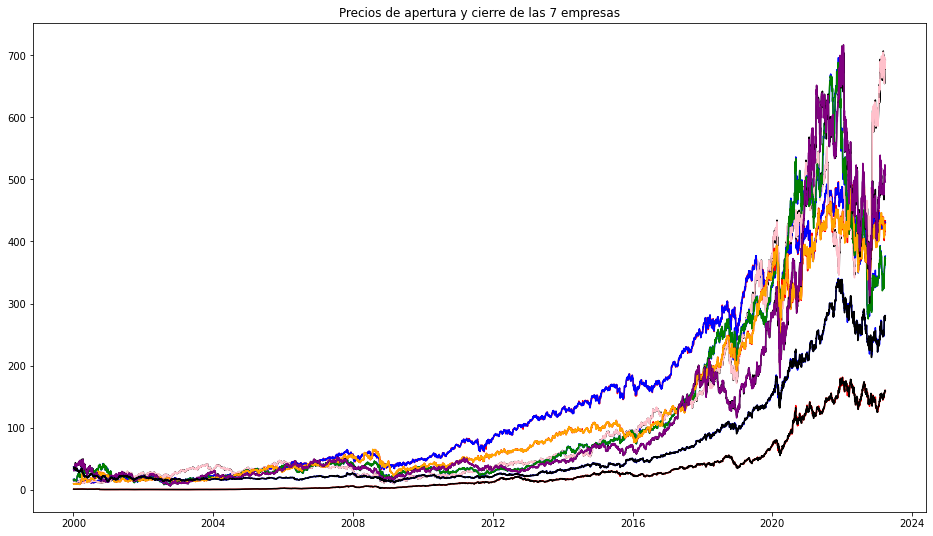

In [ ]:
#empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
plt.figure(figsize=(16, 9))

plt.plot(precios['ROP_Open'], color='red')
plt.plot(precios['ROP_Close'], color='blue')

plt.plot(precios['FICO_Open'], color='black')
plt.plot(precios['FICO_Close'], color='pink')

plt.plot(precios['ADBE_Open'], color='blue')
plt.plot(precios['ADBE_Close'], color='green')

plt.plot(precios['TDY_Open'], color='red')
plt.plot(precios['TDY_Close'], color='orange')

plt.plot(precios['LRCX_Open'], color='black')
plt.plot(precios['LRCX_Close'], color='purple')

plt.plot(precios['AAPL_Open'], color='red')
plt.plot(precios['AAPL_Close'], color='black')

plt.plot(precios['MSFT_Open'], color='blue')
plt.plot(precios['MSFT_Close'], color='black')


plt.title('Precios de apertura y cierre de las 7 empresas')
plt.show()

####visualizamos la grafica de cada empresa para ver su tendencia

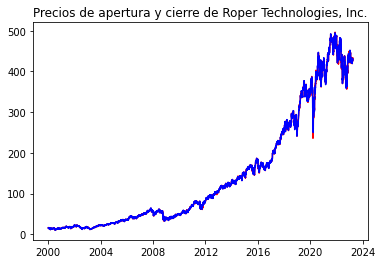

In [ ]:
#empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
#    'ROP',  # Roper Technologies, Inc., 'FICO', # Fair Isaac Corporation, 'ADBE', # Adobe Inc.
#    'TDY',  # Teledyne Technologies Incorporated, 'LRCX', # Lam Research Corporation
#    'AAPL', # Apple Inc., 'MSFT'  # Microsoft
plt.plot(precios['ROP_Open'], color='red')
plt.plot(precios['ROP_Close'], color='blue')
plt.title('Precios de apertura y cierre de Roper Technologies, Inc.')
plt.show()

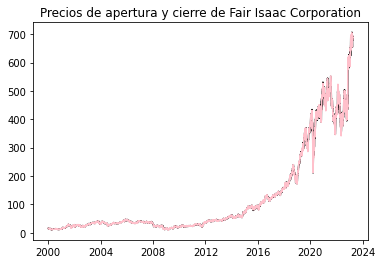

In [ ]:
#empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
#    'ROP',  # Roper Technologies, Inc., 'FICO', # Fair Isaac Corporation, 'ADBE', # Adobe Inc.
#    'TDY',  # Teledyne Technologies Incorporated, 'LRCX', # Lam Research Corporation
#    'AAPL', # Apple Inc., 'MSFT'  # Microsoft

plt.plot(precios['FICO_Open'], color='black')
plt.plot(precios['FICO_Close'], color='pink')

plt.title('Precios de apertura y cierre de Fair Isaac Corporation')
plt.show()

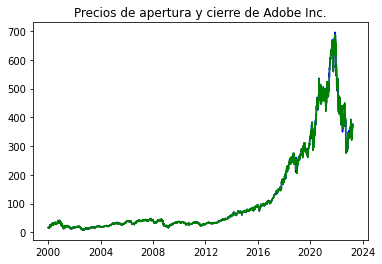

In [ ]:
#empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
#    'ROP',  # Roper Technologies, Inc., 'FICO', # Fair Isaac Corporation, 'ADBE', # Adobe Inc.
#    'TDY',  # Teledyne Technologies Incorporated, 'LRCX', # Lam Research Corporation
#    'AAPL', # Apple Inc., 'MSFT'  # Microsoft

plt.plot(precios['ADBE_Open'], color='blue')
plt.plot(precios['ADBE_Close'], color='green')

plt.title('Precios de apertura y cierre de Adobe Inc.')
plt.show()

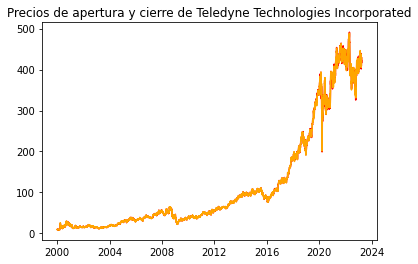

In [ ]:
#empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
#    'ROP',  # Roper Technologies, Inc., 'FICO', # Fair Isaac Corporation, 'ADBE', # Adobe Inc.
#    'TDY',  # Teledyne Technologies Incorporated, 'LRCX', # Lam Research Corporation
#    'AAPL', # Apple Inc., 'MSFT'  # Microsoft

plt.plot(precios['TDY_Open'], color='red')
plt.plot(precios['TDY_Close'], color='orange')

plt.title('Precios de apertura y cierre de Teledyne Technologies Incorporated')
plt.show()

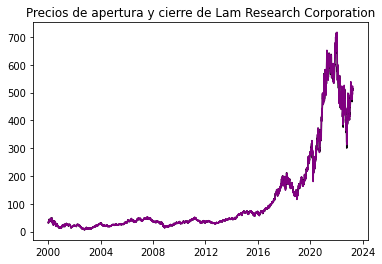

In [ ]:
#empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
#    'ROP',  # Roper Technologies, Inc., 'FICO', # Fair Isaac Corporation, 'ADBE', # Adobe Inc.
#    'TDY',  # Teledyne Technologies Incorporated, 'LRCX', # Lam Research Corporation
#    'AAPL', # Apple Inc., 'MSFT'  # Microsoft

plt.plot(precios['LRCX_Open'], color='black')
plt.plot(precios['LRCX_Close'], color='purple')

plt.title('Precios de apertura y cierre de Lam Research Corporation')
plt.show()

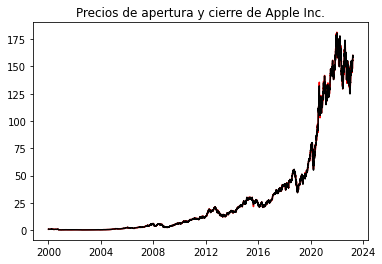

In [ ]:
#empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
#    'ROP',  # Roper Technologies, Inc., 'FICO', # Fair Isaac Corporation, 'ADBE', # Adobe Inc.
#    'TDY',  # Teledyne Technologies Incorporated, 'LRCX', # Lam Research Corporation
#    'AAPL', # Apple Inc., 'MSFT'  # Microsoft

plt.plot(precios['AAPL_Open'], color='red')
plt.plot(precios['AAPL_Close'], color='black')

plt.title('Precios de apertura y cierre de Apple Inc.')
plt.show()

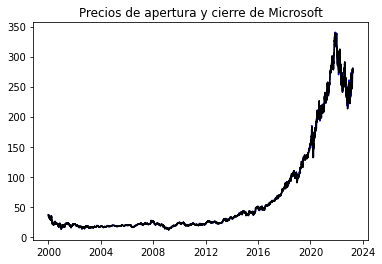

In [ ]:
#empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
#    'ROP',  # Roper Technologies, Inc., 'FICO', # Fair Isaac Corporation, 'ADBE', # Adobe Inc.
#    'TDY',  # Teledyne Technologies Incorporated, 'LRCX', # Lam Research Corporation
#    'AAPL', # Apple Inc., 'MSFT'  # Microsoft

plt.plot(precios['MSFT_Open'], color='blue')
plt.plot(precios['MSFT_Close'], color='black')

plt.title('Precios de apertura y cierre de Microsoft')
plt.show()

####guardamos el dataset precios, antes le añadimos un campo de RevenueSymbol

In [ ]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5845 entries, 2000-01-03 00:00:00-05:00 to 2023-03-27 00:00:00-04:00
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ROP_Open     5845 non-null   float64
 1   ROP_Close    5845 non-null   float64
 2   ROP_Volume   5845 non-null   int64  
 3   FICO_Open    5845 non-null   float64
 4   FICO_Close   5845 non-null   float64
 5   FICO_Volume  5845 non-null   int64  
 6   ADBE_Open    5845 non-null   float64
 7   ADBE_Close   5845 non-null   float64
 8   ADBE_Volume  5845 non-null   int64  
 9   TDY_Open     5845 non-null   float64
 10  TDY_Close    5845 non-null   float64
 11  TDY_Volume   5845 non-null   int64  
 12  LRCX_Open    5845 non-null   float64
 13  LRCX_Close   5845 non-null   float64
 14  LRCX_Volume  5845 non-null   int64  
 15  AAPL_Open    5845 non-null   float64
 16  AAPL_Close   5845 non-null   float64
 17  AAPL_Volume  5845 non-null   int64  
 18  

#####guardamos los precios de las 7 compañias tech

In [ ]:
#precios.to_csv("/content/drive/MyDrive/Colab Notebooks/PIDA/precios7companies.csv", index=False, encoding="UTF8")


In [ ]:
#volvemos a retomar
#precios = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PIDA/precios7companies.csv", encoding="UTF8")


In [ ]:
precios.insert(2, column='ROP_Revenue', value=(precios['ROP_Close'] - precios['ROP_Open']))
#al final de todo
#df = df.reindex(columns=['a','f','d','b','c','e'])

In [ ]:
precios.insert(6, column='FICO_Revenue', value=(precios['FICO_Close'] - precios['FICO_Open']))


In [ ]:
precios.insert(10, column='ADBE_Revenue', value=(precios['ADBE_Close'] - precios['ADBE_Open']))


In [ ]:
precios.insert(14, column='TDY_Revenue', value=(precios['TDY_Close'] - precios['TDY_Open']))


In [ ]:
precios.insert(18, column='LRCX_Revenue', value=(precios['LRCX_Close'] - precios['LRCX_Open']))


In [ ]:
precios.insert(22, column='AAPL_Revenue', value=(precios['AAPL_Close'] - precios['AAPL_Open']))


In [ ]:
precios.insert(26, column='MSFT_Revenue', value=(precios['MSFT_Close'] - precios['MSFT_Open']))


In [ ]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ROP_Open      5845 non-null   float64
 1   ROP_Close     5845 non-null   float64
 2   ROP_Revenue   5845 non-null   float64
 3   ROP_Volume    5845 non-null   int64  
 4   FICO_Open     5845 non-null   float64
 5   FICO_Close    5845 non-null   float64
 6   FICO_Revenue  5845 non-null   float64
 7   FICO_Volume   5845 non-null   int64  
 8   ADBE_Open     5845 non-null   float64
 9   ADBE_Close    5845 non-null   float64
 10  ADBE_Revenue  5845 non-null   float64
 11  ADBE_Volume   5845 non-null   int64  
 12  TDY_Open      5845 non-null   float64
 13  TDY_Close     5845 non-null   float64
 14  TDY_Revenue   5845 non-null   float64
 15  TDY_Volume    5845 non-null   int64  
 16  LRCX_Open     5845 non-null   float64
 17  LRCX_Close    5845 non-null   float64
 18  LRCX_Revenue  5845 non-null 

In [ ]:
precios

,ROP_Open,ROP_Close,ROP_Revenue,ROP_Volume,FICO_Open,FICO_Close,FICO_Revenue,FICO_Volume,ADBE_Open,ADBE_Close,...,LRCX_Revenue,LRCX_Volume,AAPL_Open,AAPL_Close,AAPL_Revenue,AAPL_Volume,MSFT_Open,MSFT_Close,MSFT_Revenue,MSFT_Volume
0,16.278387,15.309755,-0.968631,88000,15.191550,15.066590,-0.124959,65813,16.693562,16.274672,...,-0.182067,3183900,0.796973,0.850643,0.053670,535796800,36.615019,36.361561,-0.253459,53228400
1,15.067608,14.610198,-0.457410,153200,15.013036,14.423940,-0.589096,102263,15.638579,14.909399,...,-0.500679,3295800,0.822621,0.778926,-0.043696,512377600,35.425719,35.133266,-0.292452,54119000
2,14.610198,14.421853,-0.188345,262200,14.459638,14.281124,-0.178514,74925,14.459478,15.204172,...,-0.309511,3094800,0.788424,0.790324,0.001900,778321600,34.665345,35.503708,0.838363,64059600
3,14.421853,14.421853,0.000000,211800,14.245423,13.888394,-0.357029,127913,15.250717,15.328289,...,0.109239,2642100,0.806473,0.721931,-0.084542,767972800,34.996796,34.314407,-0.682389,54976600
4,14.368035,14.637099,0.269064,181600,13.745587,14.174021,0.428434,105638,15.281745,16.072983,...,0.364127,3684600,0.733330,0.756128,0.022798,460734400,33.885483,34.762840,0.877357,62013600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,433.700012,430.440002,-3.260010,948200,686.140015,696.880005,10.739990,246500,364.630005,374.220001,...,-9.580017,1028600,157.320007,159.279999,1.959991,73938300,274.880005,273.779999,-1.100006,34558700
5841,431.950012,428.579987,-3.370026,854100,694.059998,678.700012,-15.359985,217300,375.000000,361.709991,...,-0.690002,1213900,159.300003,157.830002,-1.470001,75701800,273.399994,272.290009,-1.109985,34873300
5842,428.739990,425.049988,-3.690002,852600,682.849976,680.849976,-2.000000,218700,368.989990,369.000000,...,9.200012,1537900,158.830002,158.929993,0.099991,67622100,277.940002,277.660004,-0.279999,36610900
5843,425.160004,429.589996,4.429993,673300,677.549988,690.940002,13.390015,130600,370.230011,374.959991,...,-12.940002,1396000,158.860001,160.250000,1.389999,59196500,277.239990,280.570007,3.330017,28172000


####guardamos archivo precios7companies para usarlo en el dashboard

In [ ]:
precios.to_csv("/content/drive/MyDrive/Colab Notebooks/PIDA/precios7companies.csv", index=False, encoding="UTF8")


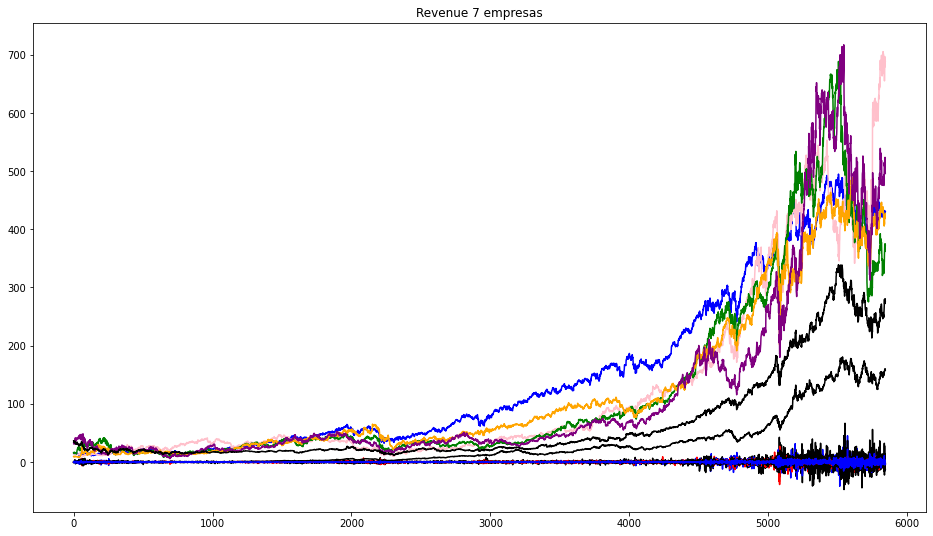

In [ ]:
#empresas = ['ROP', 'FICO', 'ADBE', 'TDY', 'LRCX', 'AAPL', 'MSFT']
plt.figure(figsize=(16, 9))

plt.plot(precios['ROP_Revenue'], color='black')
plt.plot(precios['ROP_Close'], color='blue')

plt.plot(precios['FICO_Revenue'], color='black')
plt.plot(precios['FICO_Close'], color='pink')

plt.plot(precios['ADBE_Revenue'], color='blue')
plt.plot(precios['ADBE_Close'], color='green')

plt.plot(precios['TDY_Revenue'], color='red')
plt.plot(precios['TDY_Close'], color='orange')

plt.plot(precios['LRCX_Revenue'], color='black')
plt.plot(precios['LRCX_Close'], color='purple')

plt.plot(precios['AAPL_Revenue'], color='red')
plt.plot(precios['AAPL_Close'], color='black')

plt.plot(precios['MSFT_Revenue'], color='blue')
plt.plot(precios['MSFT_Close'], color='black')

plt.title('Revenue 7 empresas')
plt.show()